#### Packages and Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to reduce the dimensions in the dataset
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# To supress warnings
import warnings

warnings.filterwarnings("ignore")


### Loading the datasets

In [2]:
train_data = pd.read_csv('ALS_TrainingData_2223.csv')
display(train_data.head(),train_data.tail(),train_data.sample(5))

ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   
2   3        38         50.0            47.0         45.0       0.008929   
3   4        63         47.0            44.0         41.0       0.012111   
4   5        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -0.965608                30                 28.0                22   
1     -0.921717                37                 33.0                21   
2     -0.914787                24                 14.0                10   
3     -0.598361                30                 29.0                24   
4     -0.444039                32                 27.5                20   

   ALSFRS_Total_range  ALT.SGPT._max  ALT.SGPT._median  ALT.SGPT._min  \
0            0.021164           24.0              22.0           18.0   
1            0.028725           25.0              13.0            8.0   
2            0.025000           25.0              20.0           14.0   
3            0.014963           62.0              60.0           41.0   
4            0.020374           38.0              26.5           22.0   

   ALT.SGPT._range  AST.SGOT._max  AST.SGOT._median  AST.SGOT._min  \
0         0.020906             31              27.5           23.0   
1         0.029617             31              17.0           14.0   
2         0.019643             24              19.0           18.0   
3         0.052369             46              40.0           33.0   
4         0.026534             35              26.5           20.0   

   AST.SGOT._range  Bicarbonate_max  Bicarbonate_median  Bicarbonate_min  \
0         0.027875             30.0                28.0             25.0   
1         0.029617             32.0                28.0             25.0   
2         0.010714             35.0                29.0             24.0   
3         0.032419             23.0                20.0             20.0   
4         0.024876             32.0                28.0             23.0   

   Bicarbonate_range  Blood.Urea.Nitrogen..BUN._max  \
0           0.017422                         8.0322   
1           0.012195                         8.3973   
2           0.019643                         5.4765   
3           0.007481                         8.0322   
4           0.014925                         5.1114   

   Blood.Urea.Nitrogen..BUN._median  Blood.Urea.Nitrogen..BUN._min  \
0                           7.11945                         6.5718   
1                           4.74630                         4.0161   
2                           4.38120                         3.6510   
3                           8.03220                         6.5718   
4                           4.19865                         3.6510   

   Blood.Urea.Nitrogen..BUN._range  bp_diastolic_max  bp_diastolic_median  \
0                         0.005089                90                 83.0   
1                         0.007633                80                 78.0   
2                         0.003260                86                 76.0   
3                         0.003642                90                 80.0   
4                         0.002422               100                 80.0   

   bp_diastolic_min  bp_diastolic_range  bp_systolic_max  bp_systolic_median  \
0                69            0.055556              160               139.0   
1                64            0.028725              140               132.5   
2                58            0.050000              120               110.0   
3                70            0.049875              150               130.0   
4                68            0.053068              160               130.0   

   bp_systolic_min  bp_systolic_range  Calcium_max  Calcium_median  \
0     

ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
2218  2419        33         50.0            49.0         45.0       0.008772   
2219  2420        61         47.0            45.0         42.0       0.009074   
2220  2421        47         46.0            44.0         41.0       0.012111   
2221  2422        37         49.0            44.0         39.0       0.017857   
2222  2424        48         48.0            45.0         40.0       0.018476   

      ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
2218     -0.239501                35                 32.5                30   
2219     -0.388711                31                 26.0                17   
2220     -0.108631                26                 23.0                20   
2221     -0.855880                34                 29.5                21   
2222     -2.050562                37                 34.0                11   

      ALSFRS_Total_range  ALT.SGPT._max  ALT.SGPT._median  ALT.SGPT._min  \
2218            0.009107           46.0              27.0           18.0   
2219            0.025408           23.0              18.0           15.0   
2220            0.010949          129.0              76.5           62.0   
2221            0.023214           95.0              51.0           42.0   
2222            0.059908           37.0              32.0           13.0   

      ALT.SGPT._range  AST.SGOT._max  AST.SGOT._median  AST.SGOT._min  \
2218         0.049123             38              27.0           23.0   
2219         0.014519             27              22.0           18.0   
2220         0.047619             62              46.0           41.0   
2221         0.094643             63              44.0           36.0   
2222         0.055427             38              28.0           11.0   

      AST.SGOT._range  Bicarbonate_max  Bicarbonate_median  Bicarbonate_min  \
2218         0.026316             31.0                28.0             23.0   
2219         0.016334             31.0                27.8             24.0   
2220         0.035016             31.0                28.0             21.0   
2221         0.048214             32.0                29.0             21.0   
2222         0.062356             31.0                27.0             22.0   

      Bicarbonate_range  Blood.Urea.Nitrogen..BUN._max  \
2218           0.014035                         5.4765   
2219           0.012704                         6.0700   
2220           0.014925                         7.8500   
2221           0.019643                         6.2067   
2222           0.020785                         7.5000   

      Blood.Urea.Nitrogen..BUN._median  Blood.Urea.Nitrogen..BUN._min  \
2218                            3.6510                        2.92080   
2219                            5.0000                        3.57000   
2220                            6.4300                        4.53000   
2221                            4.0161                        3.28590   
2222                            5.3600                        1.27785   

      Blood.Urea.Nitrogen..BUN._range  bp_diastolic_max  bp_diastolic_median  \
2218                         0.004484                85                 78.0   
2219                         0.004537                95                 90.0   
2220                         0.005817               102                 86.0   
2221                         0.005216                90                 77.0   
2222                         0.014370                90                 80.0   

      bp_diastolic_min  bp_diastolic_range  bp_systolic_max  \
2218                70            0.027322              150   
2219                80            0.027223              155   
2220                76            0.045694              140   
2221                70            0.035714              150   
2222                70            0.046083              150   

      bp_systolic_median  b

ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
134    150        67         45.0            43.0         40.0       0.008977   
55      64        45         47.0            44.0         36.4       0.018895   
155    172        41         49.0            46.5         43.0       0.010791   
1916  2086        41         48.0            47.0         45.0       0.017751   
259    287        47         54.0            51.0         47.0       0.012567   

      ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
134      -0.557082                36                 33.0                27   
55       -0.517290                29                 26.5                20   
155      -0.529907                38                 36.0                31   
1916     -1.600877                26                 19.5                17   
259      -0.404208                36                 31.0                24   

      ALSFRS_Total_range  ALT.SGPT._max  ALT.SGPT._median  ALT.SGPT._min  \
134             0.016275           38.0              26.0           22.0   
55              0.016393           64.0              38.0           23.0   
155             0.012007           83.0              57.0           39.0   
1916            0.053254           30.0              24.0           21.0   
259             0.021858           65.0              51.0           38.0   

      ALT.SGPT._range  AST.SGOT._max  AST.SGOT._median  AST.SGOT._min  \
134          0.028725             43              30.0           24.0   
55           0.073084             38              30.0           19.0   
155          0.079137             50              35.5           23.0   
1916         0.053254             32              28.0           25.0   
259          0.048474             39              32.0           27.0   

      AST.SGOT._range  Bicarbonate_max  Bicarbonate_median  Bicarbonate_min  \
134          0.034111             28.0                25.0             22.0   
55           0.033868             30.0                24.0             22.0   
155          0.048561             29.0                25.5             21.0   
1916         0.041420             33.0                29.0             22.0   
259          0.021544             35.0                29.0             27.0   

      Bicarbonate_range  Blood.Urea.Nitrogen..BUN._max  \
134            0.010772                         6.5718   
55             0.014260                         6.0700   
155            0.014388                         7.5000   
1916           0.065089                         7.6671   
259            0.014363                         5.7100   

      Blood.Urea.Nitrogen..BUN._median  Blood.Urea.Nitrogen..BUN._min  \
134                             4.7463                        4.01610   
55                              5.0000                        1.27785   
155                             5.8900                        5.00000   
1916                            6.2067                        5.11140   
259                             4.1100                        2.82000   

      Blood.Urea.Nitrogen..BUN._range  bp_diastolic_max  bp_diastolic_median  \
134                          0.004588                86                 79.0   
55                           0.008542               112                 98.0   
155                          0.004496                98                 80.0   
1916                         0.015122                92                 85.0   
259                          0.005189               100                 94.0   

      bp_diastolic_min  bp_diastolic_range  bp_systolic_max  \
134                 70            0.028933              140   
55                  70            0.076503              172   
155                 68            0.051458              136   
1916                63            0.171598              172   
259                 82            0.032787              148   

      bp_systolic_median  b

In [3]:
test_data= pd.read_csv('ALS_TestingData_78.csv')
test_data.sample(5)

ID   Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
17  25  56.813699         46.0            40.0           36       0.018083   
46  61  52.000000         46.0            43.0           41       0.011161   
34  45  54.000000         45.0            41.0           38       0.016055   
39  52  67.000000         41.0            38.0           35       0.012448   
18  26  72.000000         41.0            38.0           34       0.016627   

    ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
17     -0.656475                24                 16.0                12   
46     -1.033019                34                 27.0                19   
34     -0.760417                38                 34.0                30   
39     -1.230086                31                 21.5                 8   
18     -1.990909                29                 22.0                10   

    ALSFRS_Total_range  ALT.SGPT._max  ALT.SGPT._median  ALT.SGPT._min  \
17            0.025918             80              34.0             18   
46            0.033482             71              47.0             38   
34            0.018349             48              37.5             32   
39            0.047521             41              21.0             15   
18            0.045131            169              24.5             16   

    ALT.SGPT._range  AST.SGOT._max  AST.SGOT._median  AST.SGOT._min  \
17         0.112116             39              24.0             15   
46         0.073661             41              32.5             24   
34         0.036697             45              39.5             26   
39         0.053942             34              20.0             13   
18         0.363420            112              28.0             26   

    AST.SGOT._range  Basophils_max  Basophils_median  Basophils_min  \
17         0.043400            1.0              0.60            0.4   
46         0.037946            1.2              0.65            0.5   
34         0.043578            1.8              0.70            0.6   
39         0.043568            0.5              0.30            0.1   
18         0.204276            1.4              0.90            0.4   

    Basophils_range  Bicarbonate_max  Bicarbonate_median  Bicarbonate_min  \
17         0.001085             29.0               24.00             21.0   
46         0.001563             23.8               21.60             18.8   
34         0.002752             25.9               23.00             20.0   
39         0.000830             27.1               24.45             19.6   
18         0.002375             32.1               29.05             23.3   

    Bicarbonate_range  Bilirubin..total._max  Bilirubin..total._median  \
17           0.014467                  14.00                     10.00   
46           0.011161                  13.00                     11.00   
34           0.013532                  10.00                      6.50   
39           0.015560                  10.26                      8.55   
18           0.020903                  22.00                     15.00   

    Bilirubin..total._min  Bilirubin..total._range  \
17                   5.00                 0.016275   
46                   8.00                 0.011161   
34                   5.00                 0.011468   
39                   6.84                 0.007095   
18                  11.00                 0.026128   

    Blood.Urea.Nitrogen..BUN._max  Blood.Urea.Nitrogen..BUN._median  \
17                          6.400                             3.600   
46                          6.100                             5.000   
34                          7.300                             5.150   
39                          8.925                             5.712   
18                         10.700                             7.500   

    Blood.Urea.Nitrogen..BUN._min  Blood.Urea.Nitrogen..BUN._range   BMI_max  \
17                          2.100

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Columns: 131 entries, ID to White.Blood.Cell..WBC._range
dtypes: float64(92), int64(39)
memory usage: 80.0 KB


- The datatypes in both datasets are numeric on the account of all of them being floats and integers.

In [6]:
train = train_data.columns
test = test_data.columns

In [7]:
diff = []
for i in test:
    if i not in train:
        diff.append(i)
        
diff

['Basophils_max',
 'Basophils_median',
 'Basophils_min',
 'Basophils_range',
 'Bilirubin..total._max',
 'Bilirubin..total._median',
 'Bilirubin..total._min',
 'Bilirubin..total._range',
 'BMI_max',
 'Eosinophils_max',
 'Eosinophils_median',
 'Eosinophils_min',
 'Eosinophils_range',
 'Lymphocytes_max',
 'Lymphocytes_median',
 'Lymphocytes_min',
 'Lymphocytes_range',
 'Monocytes_max',
 'Monocytes_median',
 'Monocytes_min',
 'Monocytes_range',
 'Red.Blood.Cells..RBC._max',
 'Red.Blood.Cells..RBC._median',
 'Red.Blood.Cells..RBC._min',
 'Red.Blood.Cells..RBC._range',
 'Urine.Ph_range',
 'White.Blood.Cell..WBC._max',
 'White.Blood.Cell..WBC._median',
 'White.Blood.Cell..WBC._min',
 'White.Blood.Cell..WBC._range']

In [8]:
print (train_data.shape, test_data.shape)

(2223, 101) (78, 131)


In [9]:
# test_data.isna().sum()
# train_data.isna().sum()

# There are not missing values.

In [10]:
df = train_data.copy()
df2 = test_data.copy()

In [11]:
df.duplicated().sum()

0

In [12]:
df2.duplicated().sum()

0

- There are no duplicated rows in the datasets.

In [13]:
df.drop("ID", axis=1, inplace=True)

In [14]:
df2.drop("ID", axis=1, inplace=True)

In [15]:
df.describe().T

count           mean            std  \
Age_mean                          2223.0      54.550157      11.396546   
Albumin_max                       2223.0      47.011134       3.233980   
Albumin_median                    2223.0      43.952542       2.654804   
Albumin_min                       2223.0      40.766347       3.193087   
Albumin_range                     2223.0       0.013779       0.009567   
ALSFRS_slope                      2223.0      -0.728274       0.622329   
ALSFRS_Total_max                  2223.0      31.692308       5.314228   
ALSFRS_Total_median               2223.0      27.104926       6.633643   
ALSFRS_Total_min                  2223.0      19.877193       8.583509   
ALSFRS_Total_range                2223.0       0.026035       0.016156   
ALT.SGPT._max                     2223.0      54.436257      44.829577   
ALT.SGPT._median                  2223.0      32.993252      15.601925   
ALT.SGPT._min                     2223.0      23.014800      11.231221   
ALT.SGPT._range                   2223.0       0.071137       0.110889   
AST.SGOT._max                     2223.0      43.127755      35.288701   
AST.SGOT._median                  2223.0      29.076923       9.593911   
AST.SGOT._min                     2223.0      21.542465       7.395303   
AST.SGOT._range                   2223.0       0.049191       0.084100   
Bicarbonate_max                   2223.0      30.897301       3.164472   
Bicarbonate_median                2223.0      26.963765       2.198824   
Bicarbonate_min                   2223.0      23.164327       2.408519   
Bicarbonate_range                 2223.0       0.016868       0.011280   
Blood.Urea.Nitrogen..BUN._max     2223.0       7.353054       2.319538   
Blood.Urea.Nitrogen..BUN._median  2223.0       5.558011       1.335236   
Blood.Urea.Nitrogen..BUN._min     2223.0       4.160875       1.354256   
Blood.Urea.Nitrogen..BUN._range   2223.0       0.007133       0.005070   
bp_diastolic_max                  2223.0      92.030589       8.758227   
bp_diastolic_median               2223.0      81.113360       7.245578   
bp_diastolic_min                  2223.0      69.890688       8.443662   
bp_diastolic_range                2223.0       0.047658       0.027282   
bp_systolic_max                   2223.0     147.135403      15.754048   
bp_systolic_median                2223.0     129.579172      12.160938   
bp_systolic_min                   2223.0     113.429600      11.195037   
bp_systolic_range                 2223.0       0.071178       0.033110   
Calcium_max                       2223.0       2.474835       0.180246   
Calcium_median                    2223.0       2.345584       0.088418   
Calcium_min                       2223.0       2.222855       0.172787   
Calcium_range                     2223.0       0.000541       0.000481   
Chloride_max                      2223.0     107.152182       2.616967   
Chloride_median                   2223.0     103.473864       2.335538   
Chloride_min                      2223.0      99.264013       3.445846   
Chloride_range                    2223.0       0.017867       0.011689   
Creatinine_max                    2223.0      78.777996      19.592428   
Creatinine_median                 2223.0      65.193760      17.360351   
Creatinine_min                    2223.0      51.981765      18.448311   
Creatinine_range                  2223.0       0.058417       0.037666   
Gender_mean                       2223.0       1.637427       0.480851   
Glucose_max                       2223.0       7.160500       2.533866   
Glucose_median                    2223.0       5.487113       1.243798   
Glucose_min                       2223.0       4.265146       1.241064   
Glucose_range                     2223.0       0.006319       0.006205   
hands_max                         2223.0       6.181287       1.977363   
hands_median                      2223.0       4.905421       2.460093   
hands_min                         2223.

In [16]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral")
# plt.show()

- Visualizing a heatmap with the original columns makes it challenging to draw insights from the plot.
- Therefore, PCA and t-SNE dimensionality reduction will be applied to the dataset.


#### DImentionality Reduction

In [17]:
#n_components = 20 is random, just to see how the dataset behaves.
pca = PCA(n_components=20)
pca.fit(df)

# Printing the Eigen values
print("The eigen values")
print(pca.explained_variance_)
print("***********"*10)
#printing the Eigen vectors

print("The eigen vectors")
print(pca.components_)
print("***********"*10)

#The percentage variance explained
print('Percentage variance explained')
print(pca.explained_variance_ratio_)

The eigen values
[8.40556524e+10 1.69647419e+05 9.11825951e+03 3.10411916e+03
 9.18041430e+02 8.84045659e+02 5.67585446e+02 5.17395897e+02
 3.82130482e+02 2.62465074e+02 2.44858373e+02 1.94544206e+02
 1.53272469e+02 1.26528975e+02 1.12945215e+02 9.71383366e+01
 7.77260872e+01 6.28891634e+01 5.22809368e+01 3.75327917e+01]
**************************************************************************************************************
The eigen vectors
[[ 2.76978663e-07 -1.65117746e-07 -1.07499895e-07 ... -7.19830679e-08
  -3.45399885e-08  2.96347166e-09]
 [ 1.09120647e-03  3.38451020e-05 -3.08051469e-04 ...  2.10554137e-05
  -9.86366721e-05 -4.98725883e-05]
 [ 3.37525785e-03 -4.05309627e-03 -4.27057351e-03 ... -6.29578962e-05
   5.83796603e-04  4.37155004e-04]
 ...
 [ 6.32663331e-02  6.45377367e-03 -6.70369995e-03 ... -7.57690712e-03
   7.36376689e-04  2.81531667e-03]
 [-2.59380040e-01  4.33087277e-02  2.73641479e-02 ...  1.59821786e-03
   1.66176886e-03 -3.99012779e-04]
 [-1.97010452e-02 

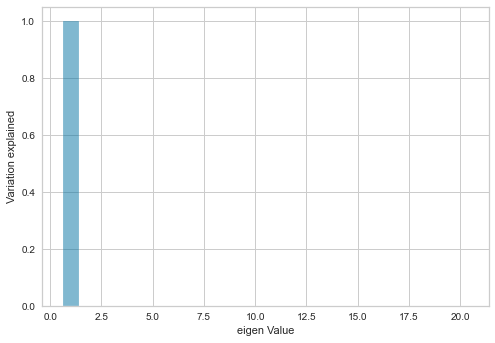

In [18]:
plt.bar(list(range(1,21)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

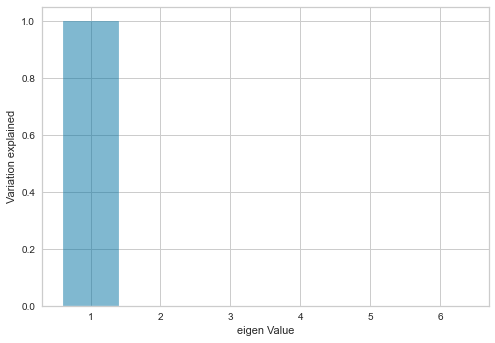

In [19]:
pca = PCA(n_components=6)
pca.fit(df)

plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()



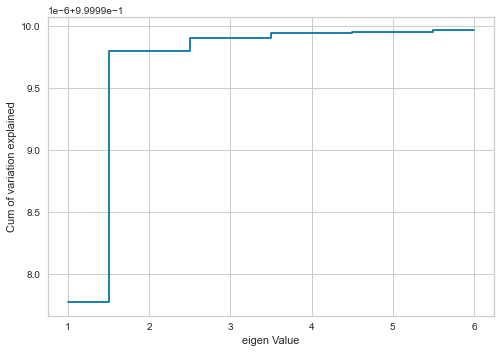

In [20]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

- With 6 variables we can explain over 97% of the variation in the original data! But, the human mind might not comprehend that many dimensions.

<Figure size 1080x1080 with 0 Axes>

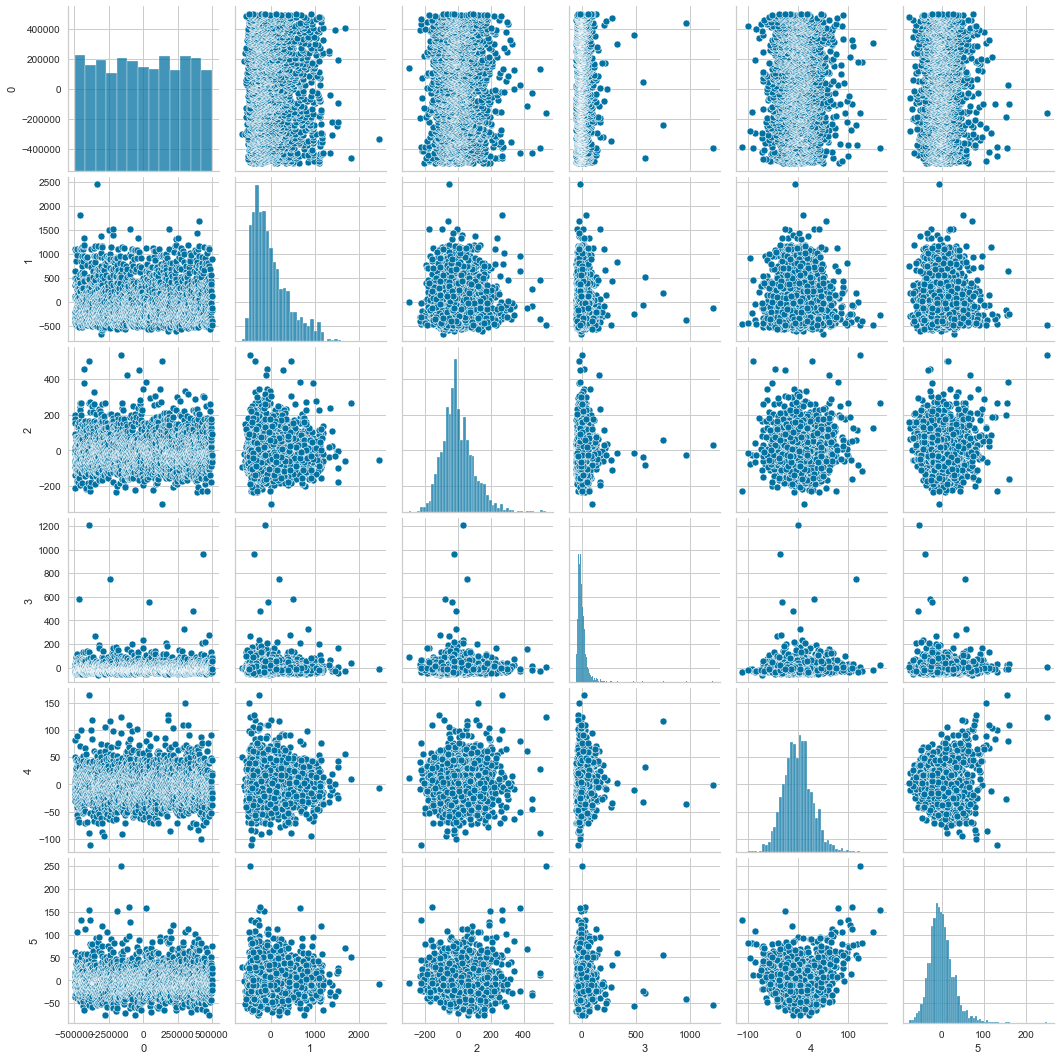

In [21]:
plt.figure(figsize=(15,15))
pca3 = PCA(n_components=6)
pca3.fit(df)
Xpca3 = pca3.transform(df)

sns.pairplot(pd.DataFrame(Xpca3))

- No generalization can be made from the distributions. Part of the dataset is approaching normal distribution, another is skewed to the right, and part of the data seems to have have unpredictable distribution.

### Standardization

In [22]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df.copy()
subset_scaled = scaler.fit_transform(subset)

In [23]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

subset_scaled_df.head(3)

Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0  0.917137     3.089417       -1.300781    -0.866550       5.480929   
1 -0.574879    -0.622016       -1.112401    -0.553303      -0.347725   
2 -1.452535     0.924415        1.148162     1.326179      -0.507103   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -0.381450         -0.318520             0.134960          0.247368   
1     -0.310907          0.998995             0.888863          0.130839   
2     -0.299769         -1.447819            -1.975969         -1.150976   

   ALSFRS_Total_range  ALT.SGPT._max  ALT.SGPT._median  ALT.SGPT._min  \
0           -0.301588      -0.679085         -0.704767      -0.446606   
1            0.166537      -0.656774         -1.281749      -1.337181   
2           -0.064100      -0.656774         -0.832985      -0.802836   

   ALT.SGPT._range  AST.SGOT._max  AST.SGOT._median  AST.SGOT._min  \
0        -0.453087      -0.343750         -0.164404       0.197134   
1        -0.374515      -0.343750         -1.259094      -1.020129   
2        -0.464480      -0.542158         -1.050582      -0.479123   

   AST.SGOT._range  Bicarbonate_max  Bicarbonate_median  Bicarbonate_min  \
0        -0.253516        -0.283619            0.471374         0.762330   
1        -0.232796         0.348541            0.471374         0.762330   
2        -0.457607         1.296780            0.926265         0.347043   

   Bicarbonate_range  Blood.Urea.Nitrogen..BUN._max  \
0           0.049077                       0.292860   
1          -0.414378                       0.450297   
2           0.246046                      -0.809203   

   Blood.Urea.Nitrogen..BUN._median  Blood.Urea.Nitrogen..BUN._min  \
0                          1.169674                       1.780659   
1                         -0.608052                      -0.106928   
2                         -0.881549                      -0.376583   

   Blood.Urea.Nitrogen..BUN._range  bp_diastolic_max  bp_diastolic_median  \
0                        -0.403233         -0.231902             0.260444   
1                         0.098656         -1.373942            -0.429788   
2                        -0.763966         -0.688718            -0.705880   

   bp_diastolic_min  bp_diastolic_range  bp_systolic_max  bp_systolic_median  \
0         -0.105510            0.289532         0.816774            0.774854   
1         -0.697803           -0.694129        -0.453027            0.240235   
2         -1.408555            0.085852        -1.722828           -1.610367   

   bp_systolic_min  bp_systolic_range  Calcium_max  Calcium_median  \
0         1.391144           0.327228     0.111898       -1.414439   
1        -0.842491          -0.197758    -0.857276       -1.978932   
2        -2.093327          -0.531883    -0.026555       -0.567701   

   Calcium_min  Calcium_range  Chloride_max  Chloride_median  Chloride_min  \
0    -0.013342       0.863965      0.706250         1.938377      1.084444   
1    -1.168779      -0.039684      0.324043        -0.631202      0.213635   
2    -0.157771      -0.105200      0.324043         1.081851      1.374714   

   Chloride_range  Creatinine_max  Creatinine_median  Creatinine_min  \
0        0.260030        0.039923           0.827718        1.015944   
1       -0.336277       -0.862670          -0.700245       -0.421909   
2       -0.917676        0.491219           0.827718        1.015944   

   Creatinine_range  Gender_mean  Glucose_max  Glucose_median  Glucose_min  \
0         -0.733335    -1.325920     0.109146       -0.797426    -0.037997   
1         -0.733335    -1.325920    -0.153752       -0.395743    -0.172186   
2         -0.712887     0.754193    -0.591917       -0.306480    -0.037997   

   Glucose_range  hands_max  hands_median  hands_min  hands_range  \
0       0.789353   0.919974      1.054904   1.132573    -0.335338   
1      -0.254893   0.919974      0.445034   1.132573    -0.69356

In [24]:
#Transforming the testset
subset2 = df2.copy()
subset_scaled2 = scaler.fit_transform(subset2)

# creating a dataframe of the scaled columns
subset_scaled_df2 = pd.DataFrame(subset_scaled2, columns=subset2.columns)

subset_scaled_df2.head(3)

Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0  0.945850     0.244852        0.596349     1.034793       0.587818   
1 -0.193890    -2.060136       -2.015032    -1.495422      -0.273925   
2  0.035316     0.244852        0.269926     0.022707      -0.526281   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -1.458910          0.526079            -1.851243         -1.341512   
1     -0.815078          0.361283             0.162818         -0.074453   
2      0.640669         -2.440247            -1.291782         -1.341512   

   ALSFRS_Total_range  ALT.SGPT._max  ALT.SGPT._median  ALT.SGPT._min  \
0            0.024737       0.988218         -0.434457      -0.033636   
1            0.765499      -0.351815          0.210699      -0.127337   
2           -0.754729      -0.497470         -0.706102      -1.064347   

   ALT.SGPT._range  AST.SGOT._max  AST.SGOT._median  AST.SGOT._min  \
0         3.342091       0.735391         -0.523946      -0.014417   
1        -0.369064       0.020715          0.443975      -0.175064   
2        -0.465540      -0.352159         -0.739040      -1.138948   

   AST.SGOT._range  Basophils_max  Basophils_median  Basophils_min  \
0         2.938099      -0.948815         -0.835895      -0.094050   
1        -0.166483      -0.418295          0.119414      -0.094050   
2        -0.440694      -0.153035          0.119414       0.884069   

   Basophils_range  Bicarbonate_max  Bicarbonate_median  Bicarbonate_min  \
0         0.259338        -0.337896            0.233431         0.798241   
1        -0.420587        -0.447865            0.233431        -0.082421   
2        -0.647939        -0.337896           -0.223473        -0.522752   

   Bicarbonate_range  Bilirubin..total._max  Bilirubin..total._median  \
0           1.294372              -0.570797                 -0.346779   
1          -0.499186               1.172846                  0.429503   
2          -0.738104              -1.268254                 -1.588829   

   Bilirubin..total._min  Bilirubin..total._range  \
0              -0.970983                 0.704731   
1              -0.087756                 0.205158   
2              -1.412596                -0.503305   

   Blood.Urea.Nitrogen..BUN._max  Blood.Urea.Nitrogen..BUN._median  \
0                       0.084951                          0.889771   
1                      -0.950541                         -0.958462   
2                       0.226155                         -0.232370   

   Blood.Urea.Nitrogen..BUN._min  Blood.Urea.Nitrogen..BUN._range   BMI_max  \
0                       1.166592                         1.012854  0.839960   
1                      -0.627765                        -0.634048  0.685970   
2                      -1.017843                        -0.336651 -0.868814   

   bp_diastolic_max  bp_diastolic_median  bp_diastolic_min  \
0          0.050251            -0.570858          0.199303   
1          1.779469             2.186226          1.024736   
2         -0.641437            -1.053347         -0.350985   

   bp_diastolic_range  bp_systolic_max  bp_systolic_median  bp_systolic_min  \
0            3.420706        -0.682162           -0.036770        -0.533412   
1            0.287992         1.184807            0.859503         0.096984   
2           -0.859650        -0.251323           -2.008572        -1.704147   

   bp_systolic_range  Calcium_max  Calcium_median  Calcium_min  Calcium_range  \
0           3.224310    -0.128960        0.353935     0.619950       0.865557   
1           0.440082    -0.714912       -0.902286    -0.257479      -0.299810   
2          -0.388303    -0.128960        0.114655     0.424966      -0.506493   

   Chloride_max  Chloride_median  Chloride_min  Chloride_range  \
0     -1.107041        -0.739884     -0.415784        2.325689   
1     -0.613617        -0.739884     -1.098545        0.101544   
2     -0.613617        -0.739884     -0.757164       -0.

### K-Means Clustering

Number of Clusters: 1 	Average Distortion: 9.522374274453115
Number of Clusters: 2 	Average Distortion: 9.121750354964314
Number of Clusters: 3 	Average Distortion: 8.95014180328988
Number of Clusters: 4 	Average Distortion: 8.793920282366704
Number of Clusters: 5 	Average Distortion: 8.682689337882215
Number of Clusters: 6 	Average Distortion: 8.602998065133567
Number of Clusters: 7 	Average Distortion: 8.523438873216378
Number of Clusters: 8 	Average Distortion: 8.453035593857004
Number of Clusters: 9 	Average Distortion: 8.417166224604548


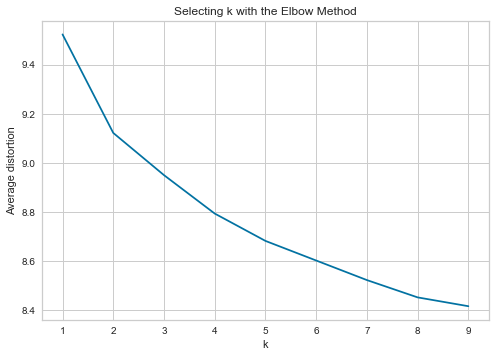

In [25]:
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

- The Elbow Curve method is helpful because it shows how increasing the number of the clusters contribute separating the clusters in a meaningful way, not in a marginal way.

- The values for K seem to be betweein 2 & 5. Further analysis will help determine the appropriate value for clustering.
- **Silhoute scores** should help in teasing out the appropriate K value

For 2_clusters, the silhouette score is 0.07794926710049846)
For 3_clusters, the silhouette score is 0.06745061517062358)
For 4_clusters, the silhouette score is 0.068671773570957)
For 5_clusters, the silhouette score is 0.056158074816190354)
For 6_clusters, the silhouette score is 0.05776757322452393)
For 7_clusters, the silhouette score is 0.04686994445575124)
For 8_clusters, the silhouette score is 0.04795318095545937)
For 9_clusters, the silhouette score is 0.0402027112650117)


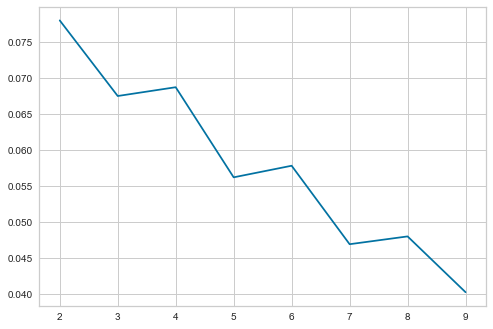

In [26]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For {}_clusters, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

In [27]:
model.cluster_centers_

array([[-4.11467436e-01,  4.18142899e-01,  5.35926031e-01,
         4.52816599e-01, -1.71843926e-01, -2.12487819e-01,
        -5.50171117e-02, -2.21708173e-01, -3.76615435e-01,
         1.97939021e-01,  2.17250919e-01,  5.19563452e-01,
         4.57370742e-01, -1.77879433e-03,  8.77547423e-02,
         3.44962086e-01,  2.20094160e-01, -4.29240438e-02,
        -2.23337640e-01, -3.17591097e-01, -3.16030467e-01,
        -1.50673537e-01, -4.20521913e-02, -5.42278338e-03,
         3.14956302e-02, -2.04441277e-01,  3.54345949e-01,
         4.25934768e-01,  3.99349839e-01, -1.55121864e-01,
         3.05554700e-02,  9.85514633e-02,  1.98382539e-01,
        -2.37931513e-01,  9.93580100e-02,  1.86665871e-01,
         1.48506893e-02, -4.52498872e-02,  2.17570510e-01,
         2.17269163e-01,  1.34156287e-01, -1.66193751e-01,
         1.51248645e-01,  1.18600768e-01, -3.80790344e-02,
         4.81469905e-02,  6.35329547e-01,  2.43444831e-01,
         2.27754451e-01,  1.97971475e-01,  1.35039275e-0

In [28]:
model.labels_

array([7, 7, 3, ..., 0, 0, 5])

- Two clusters have the highest silhoute scores, followed by 4 clusters.

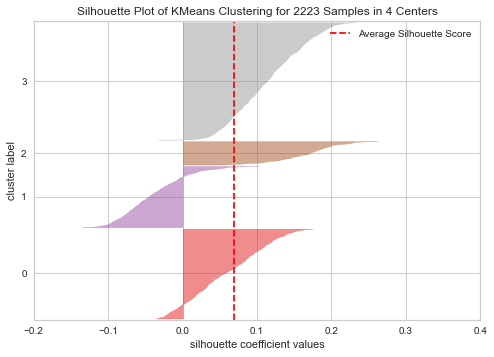

In [29]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

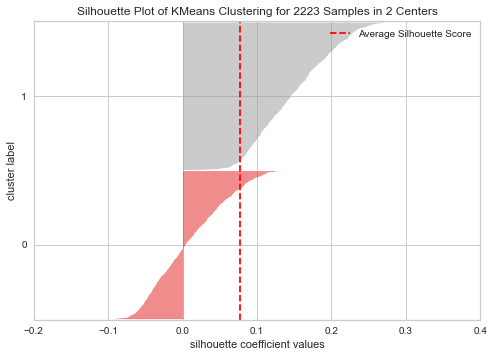

In [30]:
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

- The average silhoutte score line misses more datapoints with 4 clusters than with 2 clusters. Therefore, for the current dataset 2 clusters seem to work better.

In [31]:
df_scale2 = subset_scaled_df.copy()
kmeans_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.06936441701661918


- Using PCA to reduce the dataset to 2 or 3 components one can then plot the K-means derived clusters into 2D and 3D visuals.

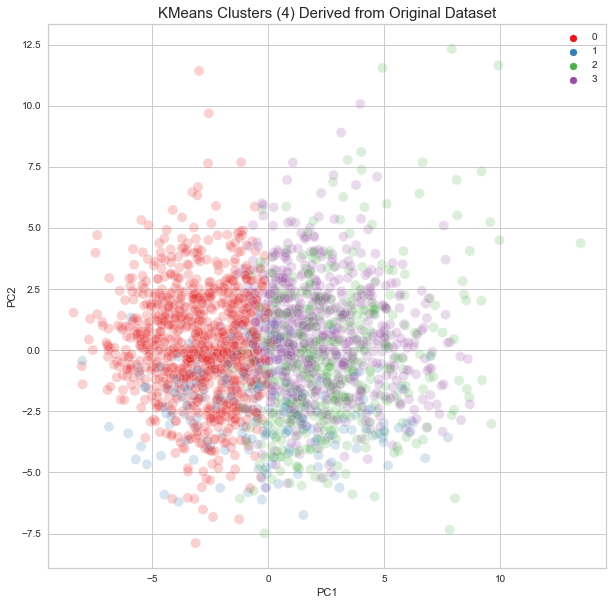

In [32]:
pca2 = PCA(n_components=3).fit(df_scale2)
pca2d = pca2.transform(df_scale2)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1], 
                hue=labels_scale, 
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [33]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_scale
trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

- We can determine the optimal number of Principal components by using the plot below. In the earlier step, the number of principal components was arbitrary.

In [34]:
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)

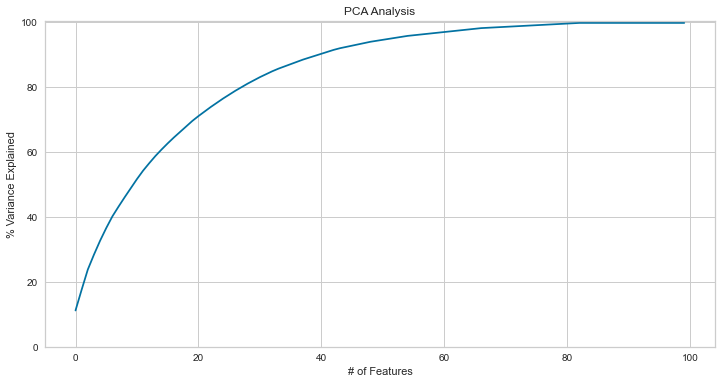

In [35]:
# The dataset has more than 100 features
pca = PCA(n_components=100)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [36]:
pca = PCA(n_components=3)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3'])
print(pca.explained_variance_ratio_)

[0.11217518 0.06382165 0.06158641]


Text(0, 0.5, 'Inertia')

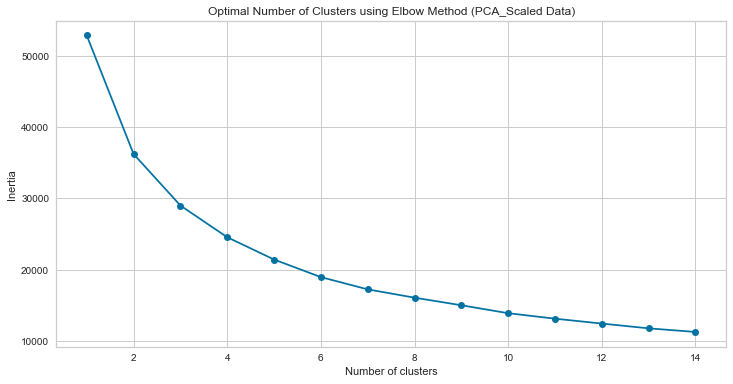

In [37]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The plot indicates that 2 is still a good number of clusters for the dataset.

In [38]:
kmeans_pca_scale = KMeans(n_clusters=2, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.28948648483413425


- One can see that the silhouette score improved by passing a lower dimensional data through the K_means algorithm.

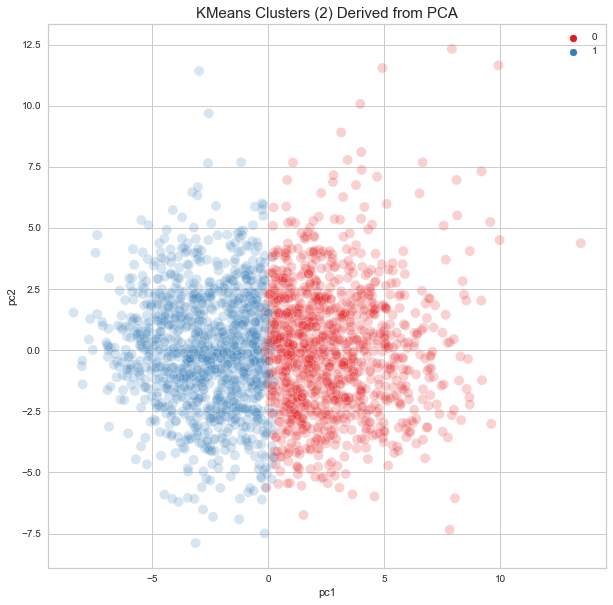

In [39]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (2) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

In [40]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_scale
trace = go.Scatter3d(x=pca_scale[:,0], y=pca_scale[:,1],z=pca_scale[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## Feature Reduction with t-SNE

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 2223 samples in 0.000s...
[t-SNE] Computed neighbors for 2223 samples in 0.258s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2223
[t-SNE] Computed conditional probabilities for sample 2000 / 2223
[t-SNE] Computed conditional probabilities for sample 2223 / 2223
[t-SNE] Mean sigma: 3.130891
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.987167
[t-SNE] KL divergence after 750 iterations: 1.716010


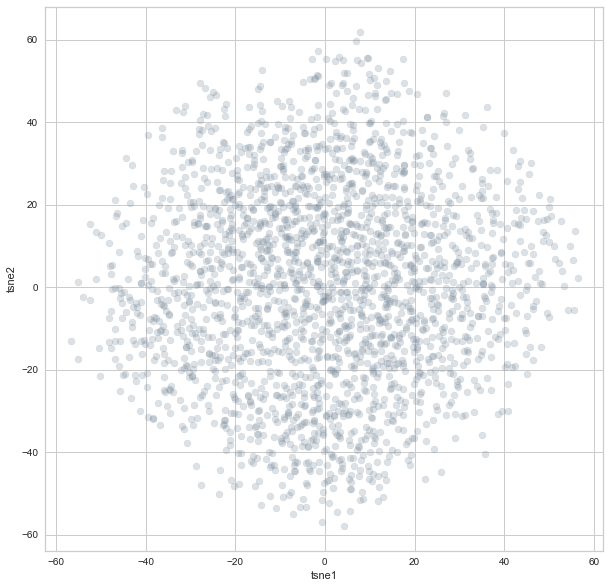

In [41]:
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=1000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

- The plot above indicates the dataset reduced to 3 t-SNE component, then plotted on a 2D space. The clusters are not clear.
- Like with PCA, one should check the number of clusters needed for the clustering.

Text(0, 0.5, 'Inertia')

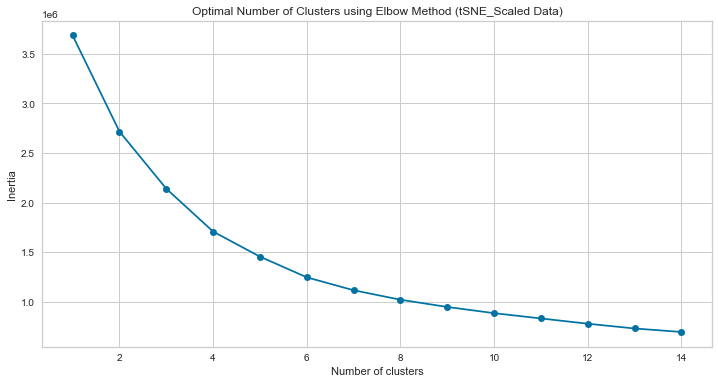

In [42]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

- 4 seems like a good cluster number.

In [43]:
kmeans_tsne_scale = KMeans(n_clusters=4, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.26367101073265076


- T-SNE silhouette scores are a little bit lower than those obtained by doing PCA.
- Below is the visualization of the degree of separation between K-means clusters from t-SNE.

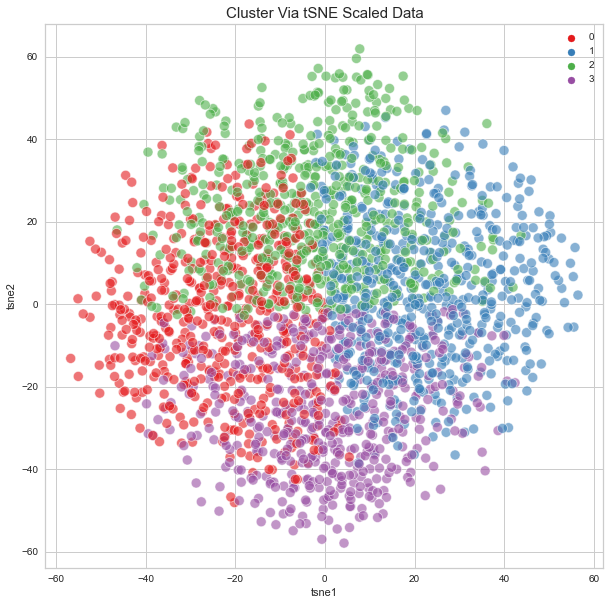

In [44]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Via tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [45]:
Scene = dict(xaxis = dict(title  = 'tsne1'),yaxis = dict(title  = 'tsne2'),zaxis = dict(title  = 'tsne3'))
labels = labels_tsne_scale
trace = go.Scatter3d(x=clusters_tsne_scale.iloc[:,0], y=clusters_tsne_scale.iloc[:,1], z=clusters_tsne_scale.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

### Cluster Profiling

In [46]:
# let's take 2 as number of clusters

kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=2, random_state=1)

In [47]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_
# subset_scaled_df.sample(5)

cluster_profilek = df.groupby("K_means_segments").mean()

cluster_profilek["K_count_in_cluster"] = (
    df.groupby("K_means_segments")["Age_mean"].count().values
)

In [48]:
# let's display cluster profiles
cluster_profilek.style.highlight_max(color="yellow", axis=0)

- For instance, using the mean age as the variable of interest, one is able to see in what cluster the older patients fall into in the several columns. 

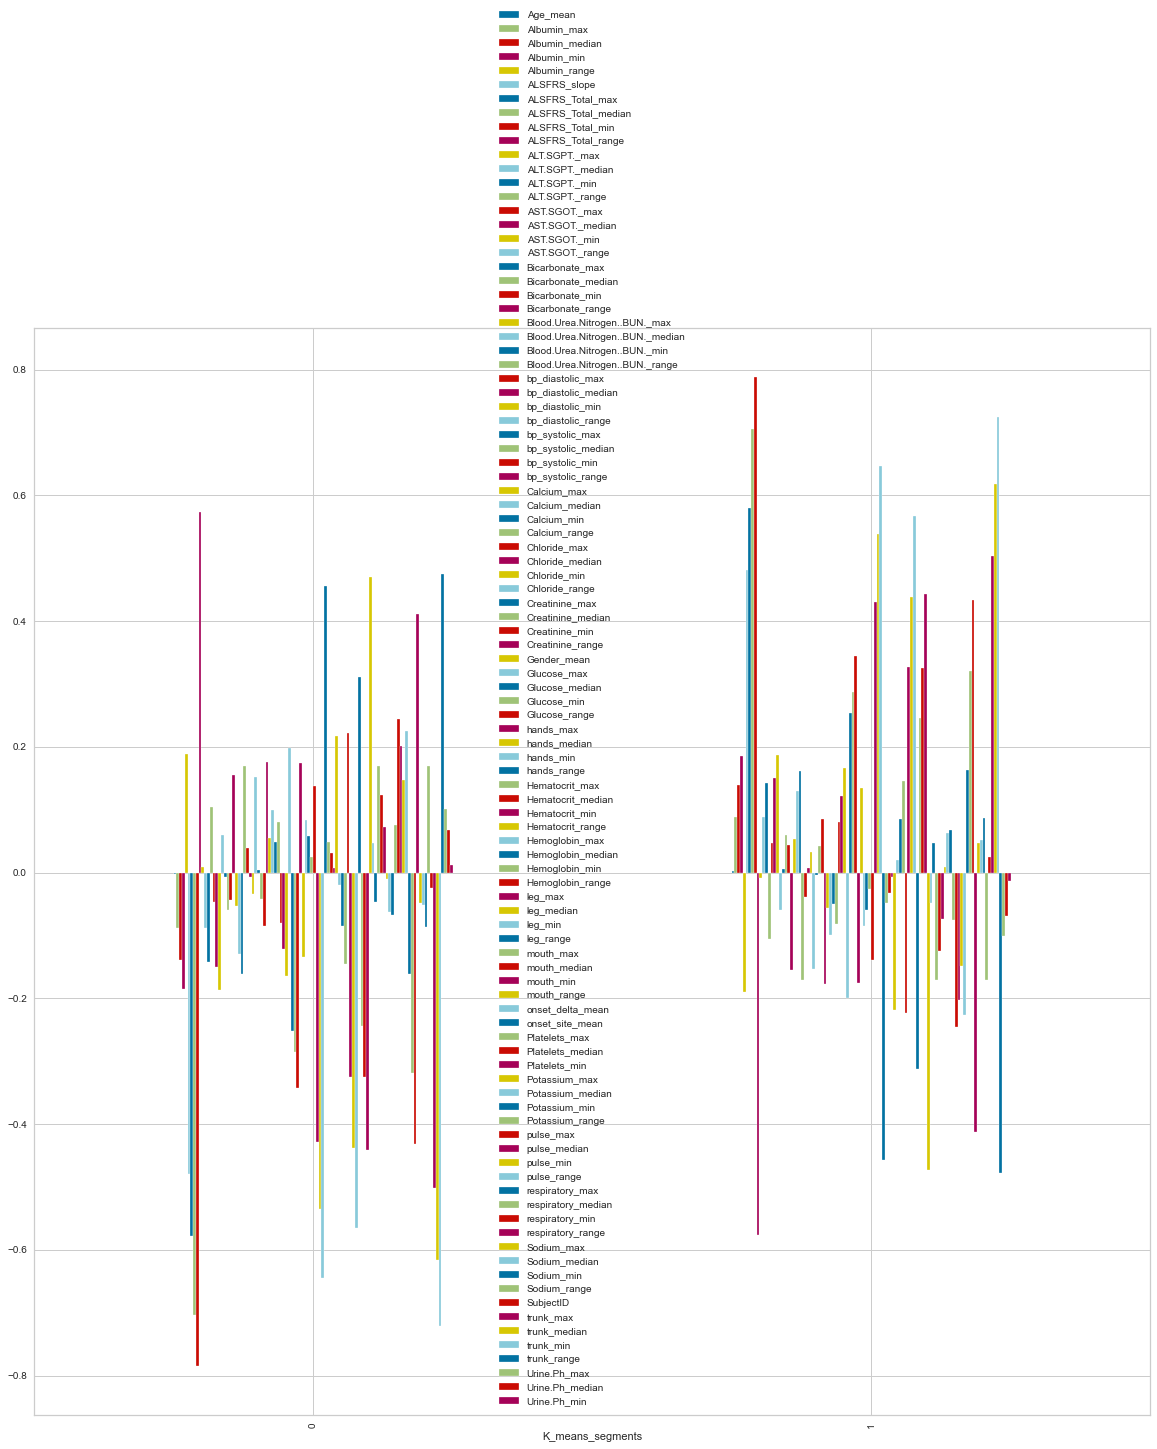

In [49]:
subset_scaled_df.groupby("K_means_segments").mean().plot.bar(figsize=(20, 20))

In [50]:
# #Getting the Centroids
# centroids = kmeans.cluster_centers_
# label = kmeans.fit_predict(subset_scaled_df)
# u_labels = np.unique(label)
# #plotting the results:
 
# for i in u_labels:
#     plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
# plt.legend()
# plt.show()

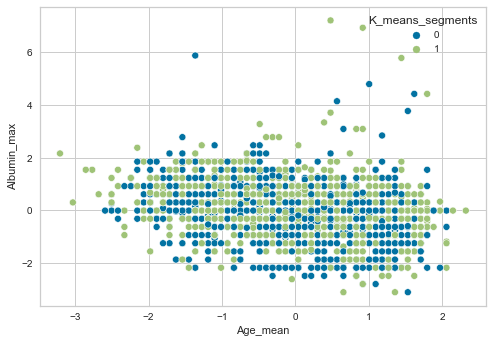

In [51]:
sns.scatterplot(data=subset_scaled_df, x= subset_scaled_df["Age_mean"], y= subset_scaled_df["Albumin_max"], hue = 'K_means_segments')

In [52]:
### considerations for further analysis

In [53]:
### Test data?

In [54]:
### Hierachical clustering?

In [55]:
###